# TABLE OF CONTENTS
### 01. Importing Libraries
### 02. Importing data
### 03. Exercise Crosstab
### 04. Task - Part I
### 05. Extra viz for Key Questions

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
path = r'C:\Users\gabri\OneDrive\Desktop\CF Data Analysys Course\Data Analytics Immersion\A4 Achivement\Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# check import
ords_prods_all.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequent_customer,first_name,last_name,gender,us_state,age,date_joined,num_of_dependents,marital_status,yearly_income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [5]:
# check import
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_sequence_per_user', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_periods_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'type_of_spender', 'median_days_prior_orders',
       'frequent_customer', 'first_name', 'last_name', 'gender', 'us_state',
       'age', 'date_joined', 'num_of_dependents', 'marital_status',
       'yearly_income'],
      dtype='object')

In [118]:
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),  index_col=0)

In [123]:
# wrangling the index and the column name
departments.index.name = 'department_id'

In [124]:
departments.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [54]:
# dataframes in this notebook
    # ords_prods_all - primary ready from former manipulations
    # ords_prods_all_cfo - primary without low_activity customers
    # departments - to create data.dict of department_id

# 03. Exercise Crosstab

In [6]:
# crosstab exercise part
crosstab = pd.crosstab(ords_prods_all['days_since_prior_order'], ords_prods_all['order_sequence_per_user'], dropna = False)

In [7]:
crosstab.to_clipboard()

# 04. Task - Part I

## Step 2 - Dealing with PII

In [8]:
# Step 2 - dropping columns related to PII (first_name and last_name)
ords_prods_all = ords_prods_all.drop(columns = ['first_name'])
ords_prods_all = ords_prods_all.drop(columns = ['last_name'])

In [9]:
# check columns exclusion
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_sequence_per_user', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_periods_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'type_of_spender', 'median_days_prior_orders',
       'frequent_customer', 'gender', 'us_state', 'age', 'date_joined',
       'num_of_dependents', 'marital_status', 'yearly_income'],
      dtype='object')

In [10]:
ords_prods_all.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,type_of_spender,median_days_prior_orders,frequent_customer,gender,us_state,age,date_joined,num_of_dependents,marital_status,yearly_income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


## Step 3 - Deriving Column us_region from us_state

In [11]:
# Step 3 mapping to check formatting of column
ords_prods_all['us_state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [12]:
# Step 3 - create a dictionary of states and regions
state_to_region = {
    # northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast',  'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 
        'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    # midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest', 
        'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    # south
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
        'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 
            'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    # west
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 
        'New Mexico': 'West', 'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}


In [13]:
# Step 3 - creation of derived column us_region based on the dictionary above
ords_prods_all['us_region'] = ords_prods_all['us_state'].map(state_to_region)

In [14]:
# Step 3 - check if creation was successful
ords_prods_all['us_region'].unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [15]:
# Step 3 - check if creation was successful 
ords_prods_all['us_region'].value_counts()

us_region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Step 3 - check if creation was successful - considering unique user_id`s
ords_prods_all.groupby(['us_region']).user_id.nunique()

us_region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

In [235]:
# step 3 - creating a crosstab with the counts of unique users
spending_counts_users = pd.crosstab(ords_prods_all['us_region'],ords_prods_all['type_of_spender'],values=ords_prods_all['user_id'],
                        aggfunc=pd.Series.nunique)

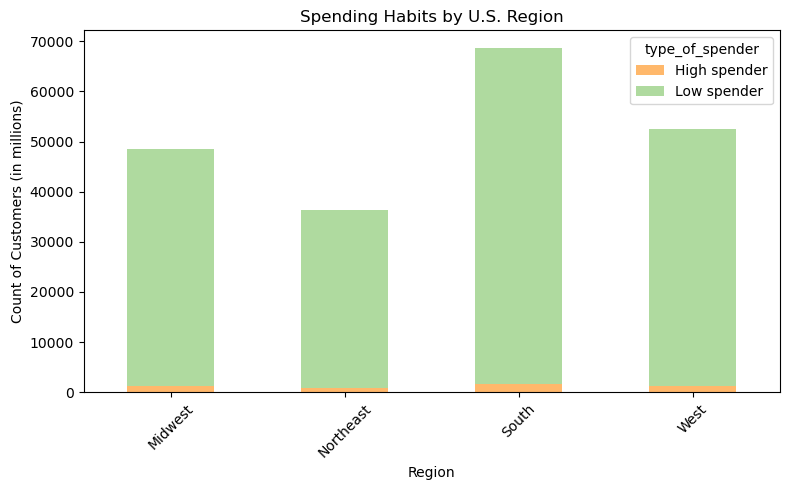

In [361]:
# Step 3 - plot with type_of_spender and us_region.
spending_habits_stacked = spending_counts_users.plot(kind='bar', stacked=True, figsize=(8,5), color = ['#FFB86B', '#AFDA9F']) 

# tidying up the axis labels and name of chart
spending_habits_stacked.set_title('Spending Habits by U.S. Region')
spending_habits_stacked.set_xlabel('Region')
spending_habits_stacked.set_ylabel('Count of Customers (in millions)')
spending_habits_stacked.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [362]:
# Step 3 - Exporting the plot
spending_habits_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 bar_stacked_spending_habits.png'))

## Step 4 - Low-activity flag and exclusion from dataframe

In [62]:
# Step 4 - create exclusing flag for low-activity (less than 5 orders) - Deriving from max_order column 

In [61]:
ords_prods_all.loc[(ords_prods_all['max_order'] < 5), 'activity_flag'] = 'low-activity'

In [60]:
ords_prods_all.loc[(ords_prods_all['max_order'] >= 5), 'activity_flag'] = 'normal-activity'

In [25]:
# Step 4 - check if creation was successful
ords_prods_all['activity_flag'].value_counts()

activity_flag
normal-activity    30964564
low-activity        1440295
Name: count, dtype: int64

In [26]:
# Step 4 - check if creation was successful - considering unique user_id`s
ords_prods_all.groupby(['activity_flag']).user_id.nunique()

activity_flag
low-activity        43578
normal-activity    162631
Name: user_id, dtype: int64

In [27]:
# Step 4 - creating the subset without low-activity customers
ords_prods_all_cfo = ords_prods_all[ords_prods_all['activity_flag'] == 'normal-activity']

In [29]:
# Step 4 - check if creation was successful
ords_prods_all_cfo['activity_flag'].value_counts()

activity_flag
normal-activity    30964564
Name: count, dtype: int64

In [30]:
# Step 4 - exporting the regular activity set for CFO
ords_prods_all_cfo.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all_cfo.pkl'))

## Step 5 Profile Creation - using CFO dataframe (ords_prods_all_cfo) as he does not want to pay attention to low-activity customers

In [32]:
# renaming column for correct interpretation
ords_prods_all_cfo.rename(columns = {'marital_status' : 'family_status'}, inplace = True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_20956\2969186030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_cfo.rename(columns = {'marital_status' : 'family_status'}, inplace = True)


In [34]:
# check if renaming was successful
ords_prods_all_cfo.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequent_customer,gender,us_state,age,date_joined,num_of_dependents,family_status,yearly_income,us_region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,normal-activity
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,normal-activity
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,normal-activity
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,normal-activity
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,normal-activity


In [49]:
#  Step 5 - Checkin Statitics for profiling - considering only unique user_ids
unique_describe = ords_prods_all_cfo.groupby('user_id')[['age', 'num_of_dependents', 'yearly_income']].first().describe()

In [50]:
unique_describe

,age,num_of_dependents,yearly_income
count,162631.000000,162631.000000,162631.000000
mean,49.531375,1.498675,95686.508821
std,18.475491,1.118166,42743.386453
min,18.000000,0.000000,25903.000000
25%,34.000000,0.000000,61717.500000
50%,49.000000,1.000000,94292.000000
75%,66.000000,2.000000,125165.000000
max,81.000000,3.000000,593901.000000


In [56]:
#  Step 5 - creation of profiles - age_profile
# Young Adult < 30 // Middle age >= 30 and < 60 // Senior >= 60

In [55]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['age'] < 30, 'age_profile'] = 'Young Adult'

C:\Users\gabri\AppData\Local\Temp\ipykernel_20956\1729847442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_cfo.loc[ords_prods_all_cfo['age'] < 30, 'age_profile'] = 'Young Adult'


In [168]:
ords_prods_all_cfo.loc[(ords_prods_all_cfo['age'] >= 30) & (ords_prods_all_cfo['age'] < 60), 'age_profile'] = 'Middle Age'

In [58]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['age'] >= 60, 'age_profile'] = 'Senior'

In [169]:
# Step 5 - check if creation was successful
ords_prods_all_cfo['age_profile'].value_counts()

age_profile
Middle Age     14572457
Senior         10574504
Young Adult     5817603
Name: count, dtype: int64

In [170]:
# Step 5 - check if creation was successful - considering unique_ids
ords_prods_all_cfo.groupby(['age_profile']).user_id.nunique()

age_profile
Middle Age     76482
Senior         55773
Young Adult    30376
Name: user_id, dtype: int64

In [67]:
#  Step 5 - creation of profiles - income_profile 
# Low income < 65000 // Middle income >= 65000 and < 125500 // High income >= 125500

In [175]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['yearly_income'] < 65000, 'income_profile'] = 'Low Income'

In [176]:
ords_prods_all_cfo.loc[(ords_prods_all_cfo['yearly_income'] >= 65000) & 
        (ords_prods_all_cfo['yearly_income'] < 125500), 'income_profile'] = 'Middle Income'

In [177]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['yearly_income'] >= 125500, 'income_profile'] = 'High Income'

In [178]:
# Step 5 - check if creation was successful
ords_prods_all_cfo['income_profile'].value_counts()

income_profile
Middle Income    15673256
High Income       8183969
Low Income        7107339
Name: count, dtype: int64

In [179]:
# Step 5 - check if creation was successful - considering unique_ids
ords_prods_all_cfo.groupby(['income_profile']).user_id.nunique()

income_profile
High Income      40350
Low Income       45148
Middle Income    77133
Name: user_id, dtype: int64

In [80]:
#  Step 5 - creation of profiles - family_size
# 0 no dependents // 1 | 2 Small family // >= 3 large family

In [162]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['num_of_dependents'] == 0 , 'family_size'] = 'No Dependents'

In [163]:
ords_prods_all_cfo.loc[(ords_prods_all_cfo['num_of_dependents'] == 1) | (ords_prods_all_cfo['num_of_dependents'] == 2), 'family_size'] = 'Small Family'

In [164]:
ords_prods_all_cfo.loc[ords_prods_all_cfo['num_of_dependents'] >= 3, 'family_size'] = 'Large Family'

In [165]:
# Step 5 - check if creation was successful
ords_prods_all_cfo['family_size'].value_counts()

family_size
Small Family     15452367
Large Family      7772516
No Dependents     7739681
Name: count, dtype: int64

In [166]:
# Step 5 - check if creation was successful - considering unique_ids
ords_prods_all_cfo.groupby(['family_size']).user_id.nunique()

family_size
Large Family     40612
No Dependents    40727
Small Family     81292
Name: user_id, dtype: int64

In [167]:
#  Step 5 - creation of profiles - vegan_leaning or non_vegan_leaning (never bought anything from certain departments)

In [128]:
# Creation of dictionary
dept_dict = departments['department'].to_dict()

In [129]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [135]:
# definition of non-vegan departments
non_vegan_depts_ids = [12, 16, 20]

In [186]:
# creation of profile vegan_profile based on user_id ever purchasing from non-vegan departments or not
ords_prods_all_cfo['vegan_profile'] = (ords_prods_all_cfo.groupby('user_id')['department_id'].transform(
        lambda x: 'Non-Vegan Leaning'
        if x.isin(non_vegan_depts_ids).any()
        else 'Vegan Leaning'
    )
)

C:\Users\gabri\AppData\Local\Temp\ipykernel_20956\2012304713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_cfo['vegan_profile'] = (ords_prods_all_cfo.groupby('user_id')['department_id'].transform(


In [187]:
# Step 5 - check if creation was successful
ords_prods_all_cfo['vegan_profile'].value_counts()

vegan_profile
Non-Vegan Leaning    30729619
Vegan Leaning          234945
Name: count, dtype: int64

In [188]:
# Step 5 - check if creation was successful - considering unique_ids
ords_prods_all_cfo.groupby('vegan_profile')['user_id'].nunique()

vegan_profile
Non-Vegan Leaning    156441
Vegan Leaning          6190
Name: user_id, dtype: int64

In [189]:
# checking new columns for flag
ords_prods_all_cfo.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,num_of_dependents,family_status,yearly_income,us_region,activity_flag,age_profile,income_profile,family_size,vegan_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2019-02-17,3,married,40423,South,normal-activity,Middle Age,Low Income,Large Family,Non-Vegan Leaning
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2019-02-17,3,married,40423,South,normal-activity,Middle Age,Low Income,Large Family,Non-Vegan Leaning
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2019-02-17,3,married,40423,South,normal-activity,Middle Age,Low Income,Large Family,Non-Vegan Leaning
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2019-02-17,3,married,40423,South,normal-activity,Middle Age,Low Income,Large Family,Non-Vegan Leaning
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2019-02-17,3,married,40423,South,normal-activity,Middle Age,Low Income,Large Family,Non-Vegan Leaning


In [471]:
ords_prods_all_cfo.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all_cfo_extra_flags.pkl'))

## Step 6 - Distribution of profiles - age_profile, income_profile, family_size, vegan_profile

In [194]:
# step 6 - age-profile definition of count and percentage for plotting - considering unique user_ids
# counts definition
age_profile_counts = (ords_prods_all_cfo.groupby('age_profile')['user_id'].nunique().sort_values(ascending=False))

# percentage definition
age_profile_perc = age_profile_counts / age_profile_counts.sum()

In [ ]:
# step 6 - distribution chart for age_profile - considering unique user_ids
age_profile_dist = age_profile_counts.plot(kind='bar', figsize=(8,5), color='#AFDA9F')

# tidying up the axis labels and name of chart
age_profile_dist.set_title('Number of Users by Age Profile')
age_profile_dist.set_xlabel('Age Profile')
age_profile_dist.set_ylabel('Number of Users')
age_profile_dist.tick_params(axis='x', rotation=45)

# inclusion of % over total per age profile
for i, (count, perc) in enumerate(zip(age_profile_counts, age_profile_perc)):
    age_profile_dist.text(
        i,
        count / 2,
        f'{perc:.1%}',
        ha='center',
        va='center'
    )

# avoiding .png to be cut
plt.tight_layout()

In [364]:
# step 6 - exporting the chart
age_profile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 age_profile_dist.png'))

In [193]:
# step 6 - income_profile definition of count and percentage for plotting - considering unique user_ids
# counts definition
income_profile_counts = (ords_prods_all_cfo.groupby('income_profile')['user_id'].nunique().sort_values(ascending=False))

# percentage definition
income_profile_perc = income_profile_counts / income_profile_counts.sum()

In [ ]:
# step 6 - distribution chart for income_profile - considering unique user_ids
income_profile_dist = income_profile_counts.plot(kind='bar', figsize=(8,5), color='#8FAFC2')

# tidying up the axis labels and name of chart
income_profile_dist.set_title('Number of Users by Income Profile')
income_profile_dist.set_xlabel('Income Profile')
income_profile_dist.set_ylabel('Number of Users')
income_profile_dist.tick_params(axis='x', rotation=45)

# inclusion of % over total per income profile
for i, (count, perc) in enumerate(zip(income_profile_counts, income_profile_perc)):
    income_profile_dist.text(
        i,
        count / 2,
        f'{perc:.1%}',
        ha='center',
        va='center'
    )

# avoiding .png to be cut
plt.tight_layout()

In [366]:
# step 6 - exporting the chart
income_profile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 income_profile_dist.png'))

In [192]:
# step 6 - family_size definition of count and percentage for plotting - considering unique user_ids
# counts definition
family_size_counts = (ords_prods_all_cfo.groupby('family_size')['user_id'].nunique().sort_values(ascending=False))

# percentage definition
family_size_perc = family_size_counts / family_size_counts.sum()

In [ ]:
# step 6 - distribution chart for family_size - considering unique user_ids
family_size_dist = family_size_counts.plot(kind='bar', figsize=(8,5), color='#B79AC8')

# tidying up the axis labels and name of chart
family_size_dist.set_title('Number of Users by Family Size')
family_size_dist.set_xlabel('Family Profile')
family_size_dist.set_ylabel('Number of Users')
family_size_dist.tick_params(axis='x', rotation=45)

# inclusion of % over total per family size
for i, (count, perc) in enumerate(zip(family_size_counts, family_size_perc)):
    family_size_dist.text(
        i,
        count / 2,
        f'{perc:.1%}',
        ha='center',
        va='center'
    )

# avoiding .png to be cut
plt.tight_layout()

In [436]:
# step 6 - exporting the chart
family_size_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 family_size_dist.png'))

In [191]:
# step 6 - vegan_profile definition of count and percentage for plotting - considering unique user_ids
# counts definition
vegan_profile_counts = (ords_prods_all_cfo.groupby('vegan_profile')['user_id'].nunique().sort_values(ascending=False))

# percentage definition
vegan_profile_perc = vegan_profile_counts / vegan_profile_counts.sum()

In [ ]:
# step 6 - distribution chart for vegan_profile - considering unique user_ids
vegan_profile_dist = vegan_profile_counts.plot(kind='bar', figsize=(8,5), color='#FFB86B')

# tidying up the axis labels and name of chart
vegan_profile_dist.set_title('Number of Users by Eating Habits')
vegan_profile_dist.set_xlabel('Vegan Inclination')
vegan_profile_dist.set_ylabel('Number of Users')
vegan_profile_dist.tick_params(axis='x', rotation=45)

# inclusion of % over total per family size
for i, (count, perc) in enumerate(zip(vegan_profile_counts, vegan_profile_perc)):
    vegan_profile_dist.text(
        i,
        count / 2,
        f'{perc:.1%}',
        ha='center',
        va='center'
    )

# avoiding .png to be cut
plt.tight_layout()

In [440]:
# Exporting the plot
vegan_profile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 vegan_profile_dist.png'))

## Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### Profiles titles: age_profile, income_profile, family_size, vegan_profile


In [220]:
# Step 7 - aggregation max, mean and min in usage frequency (median_days_prior_orders) age_profile
ords_prods_all_cfo.groupby('age_profile').agg({'median_days_prior_orders': ['min', 'mean', 'max']})

median_days_prior_orders                
                                 min      mean   max
age_profile                                         
Middle Age                       0.0  9.967457  30.0
Senior                           0.0  9.950940  30.0
Young Adult                      0.0  9.942566  30.0

In [223]:
# step 7 - aggregation max, mean and min in expenditure (prices) age_profile
ords_prods_all_cfo.groupby('age_profile').agg({'prices': ['min', 'mean', 'max']})

prices                
               min      mean   max
age_profile                       
Middle Age     1.0  7.790448  25.0
Senior         1.0  7.795473  25.0
Young Adult    1.0  7.782230  25.0

In [224]:
# step 7 - aggregation max, mean and min in usage frequency (median_days_prior_orders) income_profile
ords_prods_all_cfo.groupby('income_profile').agg({'median_days_prior_orders': ['min', 'mean', 'max']})

median_days_prior_orders                 
                                    min       mean   max
income_profile                                          
High Income                         0.0   9.874061  30.0
Low Income                          0.0  10.224431  30.0
Middle Income                       0.0   9.879313  30.0

In [225]:
# step 7 - aggregation max, mean and min in expenditure (prices) income_profile
ords_prods_all_cfo.groupby('income_profile').agg({'prices': ['min', 'mean', 'max']})

prices                
                  min      mean   max
income_profile                       
High Income       1.0  7.951163  25.0
Low Income        1.0  7.242912  25.0
Middle Income     1.0  7.955203  25.0

In [226]:
# step 7 - aggregation max, mean and min in usage frequency (median_days_prior_orders) family_size
ords_prods_all_cfo.groupby('family_size').agg({'median_days_prior_orders': ['min', 'mean', 'max']})

median_days_prior_orders                
                                   min      mean   max
family_size                                           
Large Family                       0.0  9.949826  30.0
No Dependents                      0.0  9.936568  30.0
Small Family                       0.0  9.971122  30.0

In [227]:
# step 7 - aggregation max, mean and min in expenditure (prices) family_size
ords_prods_all_cfo.groupby('family_size').agg({'prices': ['min', 'mean', 'max']})

prices                
                 min      mean   max
family_size                         
Large Family     1.0  7.792914  25.0
No Dependents    1.0  7.789584  25.0
Small Family     1.0  7.789985  25.0

In [228]:
# step 7 - aggregation max, mean and min in usage frequency (median_days_prior_orders) vegan_profile
ords_prods_all_cfo.groupby('vegan_profile').agg({'median_days_prior_orders': ['min', 'mean', 'max']})

median_days_prior_orders                 
                                       min       mean   max
vegan_profile                                              
Non-Vegan Leaning                      0.0   9.926418  30.0
Vegan Leaning                          0.0  13.975247  30.0

In [229]:
# step 7 - aggregation max, mean and min in expenditure (prices) vegan_profile
ords_prods_all_cfo.groupby('vegan_profile').agg({'prices': ['min', 'mean', 'max']})

prices                
                     min      mean   max
vegan_profile                           
Non-Vegan Leaning    1.0  7.797089  25.0
Vegan Leaning        1.0  6.944616  20.0

### Step 7 quick analysis: tehre are no meaninful differences per customer profile, except on the vegan_profile one. On this, we can see that Non-Vegan Leaning uses the app more often than the Vegan Leaning and that they also buy more expensive products

## Step 8 - Comparing your customer profiles with regions (us_region) and departments (department_id and dept_dict)

#### Profiles titles: age_profile, income_profile, family_size, vegan_profile

In [278]:
# Step 8 - creating a crosstab age_profile vs us_region with the counts of unique users
age_region_crosstab = pd.crosstab(ords_prods_all_cfo['us_region'],ords_prods_all_cfo['age_profile'],values=ords_prods_all_cfo['user_id'],
                      aggfunc=pd.Series.nunique)

In [ ]:
# Step 8 - plot heat with age_profile and us_region.
age_region_heat = sns.heatmap(age_region_crosstab, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Customer Count'})

# tidying up the axis labels and name of chart
age_region_heat.set_title('Age Profile by U.S. Region')
age_region_heat.set_xlabel('Age Profile')
age_region_heat.set_ylabel('Region')
age_region_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [372]:
# Step 8 - Exporting plot age_profile
age_region_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 age_region_heat.png'))

In [318]:
# Step 8 - creating a crosstab age_profile vs department_id
age_depts_crosstab = pd.crosstab(ords_prods_all_cfo['department_id'].map(dept_dict),ords_prods_all_cfo['age_profile'])

In [ ]:
# plot bar age_profile and department
age_depts_heat = sns.heatmap(age_depts_crosstab, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Total orders'})

# tidying up the axis labels and name of chart
age_depts_heat.set_title('Department Purchase per Age Group')
age_depts_heat.set_xlabel('Age Profile')
age_depts_heat.set_ylabel('Deparment')
age_depts_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [374]:
# Step 8 - Exporting plot age_profile
age_depts_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 age_depts_heat.png'))

In [329]:
# Step 8 - creating a crosstab income_profile vs us_region with the counts of unique users
income_region_crosstab = pd.crosstab(ords_prods_all_cfo['us_region'],ords_prods_all_cfo['income_profile'],values=ords_prods_all_cfo['user_id'],
                      aggfunc=pd.Series.nunique)

In [ ]:
# Step 8 - plot heat with income_profile and us_region.
income_region_heat = sns.heatmap(income_region_crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Customer Count'})

# tidying up the axis labels and name of chart
income_region_heat.set_title('Income Profile by U.S. Region')
income_region_heat.set_xlabel('Income Profile')
income_region_heat.set_ylabel('Region')
income_region_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [377]:
# Step 8 - Exporting plot income_profile
income_region_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 income_region_heat.png'))

In [347]:
# Step 8 - creating a crosstab income_profile vs department_id
income_depts_crosstab = pd.crosstab(ords_prods_all_cfo['department_id'].map(dept_dict),ords_prods_all_cfo['income_profile'])

In [ ]:
# Step 8 - plot heat with income_profile and department.
income_dept_heat = sns.heatmap(income_depts_crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Total Orders'})

# tidying up the axis labels and name of chart
income_dept_heat.set_title('Department Purchase by Income Profile')
income_dept_heat.set_xlabel('Income Profile')
income_dept_heat.set_ylabel('Department')
income_dept_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [379]:
# Step 8 - Exporting plot income_profile
income_dept_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 income_dept_heat.png'))

In [346]:
# Step 8 - creating a crosstab family_size vs us_region with the counts of unique users
family_region_crosstab = pd.crosstab(ords_prods_all_cfo['us_region'],ords_prods_all_cfo['family_size'],values=ords_prods_all_cfo['user_id'],
                      aggfunc=pd.Series.nunique)

In [ ]:
# Step 8 - plot heat with family_size and us_region.
family_region_heat = sns.heatmap(family_region_crosstab, annot=True, fmt='d', cmap='Purples', cbar_kws={'label': 'Customer Count'})

# tidying up the axis labels and name of chart
family_region_heat.set_title('Family Profile by U.S. Region')
family_region_heat.set_xlabel('Family Profile')
family_region_heat.set_ylabel('Region')
family_region_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [381]:
# Step 8 - Exporting plot family_size
family_region_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 family_region_heat.png'))

In [344]:
# Step 8 - creating a crosstab family_size vs department_id 
family_depts_crosstab = pd.crosstab(ords_prods_all_cfo['department_id'].map(dept_dict),ords_prods_all_cfo['family_size'])

In [ ]:
# Step 8 - plot heat with family_size and department.
family_dept_heat = sns.heatmap(family_depts_crosstab, annot=True, fmt='d', cmap='Purples', cbar_kws={'label': 'Total Orders'})

# tidying up the axis labels and name of chart
family_dept_heat.set_title('Department Purchase by Family Size')
family_dept_heat.set_xlabel('Family Profile')
family_dept_heat.set_ylabel('Department')
family_dept_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [383]:
# Step 8 - Exporting plot family_size
family_dept_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 family_dept_heat.png'))

In [343]:
# Step 8 - creating a crosstab vegan_profile vs us_region with the counts of unique users
vegan_region_crosstab = pd.crosstab(ords_prods_all_cfo['us_region'],ords_prods_all_cfo['vegan_profile'],values=ords_prods_all_cfo['user_id'],
                      aggfunc=pd.Series.nunique)

In [ ]:
# Step 8 - plot heat with vegan_profile and us_region.
vegan_profile_heat = sns.heatmap(vegan_region_crosstab, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Customer Count'})

# tidying up the axis labels and name of chart
vegan_profile_heat.set_title('Eating Habits by U.S. Region')
vegan_profile_heat.set_xlabel('Vegan Inclination')
vegan_profile_heat.set_ylabel('Region')
vegan_profile_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [385]:
# Step 8 - Exporting plot vegan_profile
vegan_profile_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 vegan_profile_heat.png'))

In [357]:
# Step 8 - creating a crosstab vegan profile vs department_id 
vegan_depts_crosstab = pd.crosstab(ords_prods_all_cfo['department_id'].map(dept_dict),ords_prods_all_cfo['vegan_profile'])

In [ ]:
# Step 8 - plot heat with vegan_profile and department.
vegan_dept_heat = sns.heatmap(vegan_depts_crosstab, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Total Orders'})

# tidying up the axis labels and name of chart
vegan_dept_heat.set_title('Department Purchase by Eating Habits')
vegan_dept_heat.set_xlabel('Vegan Inclination')
vegan_dept_heat.set_ylabel('Department')
vegan_dept_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [387]:
# Step 8 - Exporting plot vegan_profile
vegan_dept_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 vegan_dept_heat.png'))

## Step 8 extra - Profiles below by 'orders_day_of_week' and 'order_hour_of_day'

#### Profiles titles: age_profile, income_profile, family_size

In [391]:
# Step 8 extra - creating a dictionary for hte days of the week
dow_dict = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

In [396]:
# Step 8 extra - checking the creation of the dictionary
dow_dict

{0: 'Saturday',
 1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday'}

In [397]:
# Step 8 extra - Defining the order of the days
dow_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [401]:
# Step 8 extra - creating a crosstab age_profile vs orders_day_of_week
age_dow_crosstab = pd.crosstab(ords_prods_all_cfo['orders_day_of_week'].map(dow_dict),ords_prods_all_cfo['age_profile'])

In [ ]:
# Step 8 - plot bar chart with age_profile and days of the week.
age_dow_bar = age_dow_crosstab.reindex(dow_order).plot(kind='bar', figsize=(8,5), color = ['#77A870', '#AFDA9F', '#D9F0C9']) 

# tidying up the axis labels and name of chart
age_dow_bar.set_title('Orders per day of week')
age_dow_bar.set_xlabel('Day of the week')
age_dow_bar.set_ylabel('Total Orders')
age_dow_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [429]:
# Step 8 - Exporting plot
age_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 age_dow_bar.png'))

In [389]:
# Step 8 extra - creating a crosstab age_profile vs order_hour_of_day
age_hod_crosstab = pd.crosstab(ords_prods_all_cfo['order_hour_of_day'],ords_prods_all_cfo['age_profile'])

In [ ]:
# Step 8 extra - plot bar chart with age_profile and days of the week.
age_hod_bar = age_hod_crosstab.plot(kind='bar', figsize=(8,5), color = ['#77A870', '#AFDA9F', '#D9F0C9']) 

# tidying up the axis labels and name of chart
age_hod_bar.set_title('Orders per hour of day')
age_hod_bar.set_xlabel('Hour of Day')
age_hod_bar.set_ylabel('Total Orders')
age_hod_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [430]:
# Step 8 extra - Exporting plot
age_hod_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 age_hod_bar.png'))

In [418]:
# Step 8 extra - creating a crosstab income_profile vs orders_day_of_week
income_dow_crosstab = pd.crosstab(ords_prods_all_cfo['orders_day_of_week'].map(dow_dict),ords_prods_all_cfo['income_profile'])

In [ ]:
# Step 8 - plot bar chart with age_profile and days of the week.
income_dow_bar = income_dow_crosstab.reindex(dow_order).plot(kind='bar', figsize=(8,5), color = ['#567891', '#8FAFC2', '#C6D8E4']) 

# tidying up the axis labels and name of chart
income_dow_bar.set_title('Orders per day of week')
income_dow_bar.set_xlabel('Day of the week')
income_dow_bar.set_ylabel('Total Orders')
income_dow_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [428]:
# Step 8 - Exporting plot
income_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 income_dow_bar.png'))

In [421]:
# Step 8 extra - creating a crosstab age_profile vs order_hour_of_day
income_hod_crosstab = pd.crosstab(ords_prods_all_cfo['order_hour_of_day'],ords_prods_all_cfo['income_profile'])

In [ ]:
# Step 8 extra - plot bar chart with age_profile and days of the week.
income_hod_bar = income_hod_crosstab.plot(kind='bar', figsize=(8,5), color = ['#567891', '#8FAFC2', '#C6D8E4']) 

# tidying up the axis labels and name of chart
income_hod_bar.set_title('Orders per hour of day')
income_hod_bar.set_xlabel('Hour of Day')
income_hod_bar.set_ylabel('Total Orders')
income_hod_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [427]:
# Step 8 extra - Exporting plot
income_hod_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 income_hod_bar.png'))

In [424]:
# Step 8 extra - creating a crosstab family_size vs orders_day_of_week
family_dow_crosstab = pd.crosstab(ords_prods_all_cfo['orders_day_of_week'].map(dow_dict),ords_prods_all_cfo['family_size'])

In [ ]:
# Step 8 - plot bar chart with family_size and days of the week.
family_dow_bar = family_dow_crosstab.reindex(dow_order).plot(kind='bar', figsize=(8,5), color = ['#7E6099', '#B79AC8', '#DBC5E8']) 

# tidying up the axis labels and name of chart
family_dow_bar.set_title('Orders per day of week')
family_dow_bar.set_xlabel('Day of the week')
family_dow_bar.set_ylabel('Total Orders')
family_dow_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [431]:
# Step 8 - Exporting plot
family_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 family_dow_bar.png'))

In [432]:
# Step 8 extra - creating a crosstab family_size vs order_hour_of_day
family_hod_crosstab = pd.crosstab(ords_prods_all_cfo['order_hour_of_day'],ords_prods_all_cfo['family_size'])

In [ ]:
# Step 8 extra - plot bar chart with age_profile and days of the week.
family_hod_bar = family_hod_crosstab.plot(kind='bar', figsize=(8,5), color = ['#7E6099', '#B79AC8', '#DBC5E8']) 

# tidying up the axis labels and name of chart
family_hod_bar.set_title('Orders per hour of day')
family_hod_bar.set_xlabel('Hour of Day')
family_hod_bar.set_ylabel('Total Orders')
family_hod_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [434]:
# Step 8 extra - Exporting plot 
family_hod_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 family_hod_bar.png'))

# 05. Extra viz for Key Questions

In [441]:
# Building crosstab between vegan and loaylty flag
vegan_loyalty_crosstab = pd.crosstab(ords_prods_all_cfo['loyalty_flag'],ords_prods_all_cfo['vegan_profile'],values=ords_prods_all_cfo['user_id'],
                      aggfunc=pd.Series.nunique)

In [ ]:
# plotting the relationship between the variable
vegan_loyalty_bar = vegan_loyalty_crosstab.plot(kind='bar', figsize=(8,5), color = ['#CC7A42', '#FFB86B', '#FFD8A0'])

                                          
# tidying up the axis labels and name of chart
vegan_loyalty_bar.set_title('Does Eating Habits affect loyalty?')
vegan_loyalty_bar.set_xlabel('Loyalty')
vegan_loyalty_bar.set_ylabel('Total user_ids')
vegan_loyalty_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [449]:
# Exporting plot 
vegan_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 vegan_loyalty_bar.png'))

In [472]:
# defining counts per department
dept_counts = ords_prods_all_cfo['department_id'].map(dept_dict).value_counts().sort_values(ascending=True)

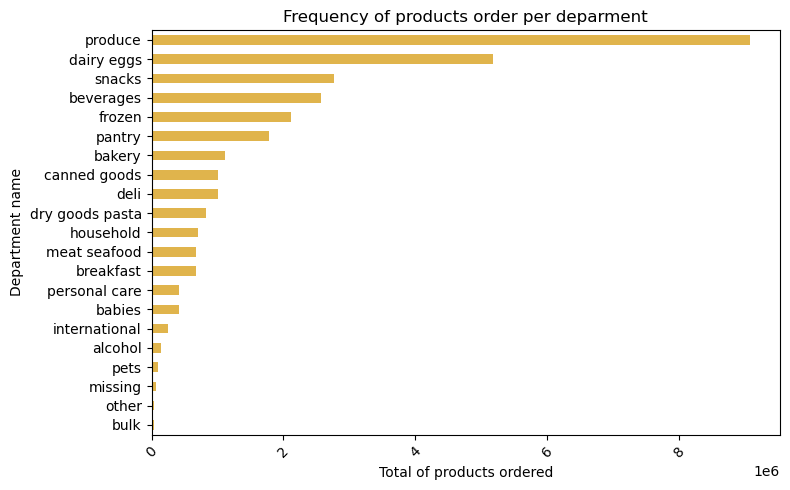

In [476]:
# plotting - which departments have the highest frequency of products ordered?
dept_frequence_bar = dept_counts.plot(kind='barh', figsize=(8,5), color = '#E0B44C')

# tidying up the axis labels and name of chart
dept_frequence_bar.set_title('Frequency of products order per deparment')
dept_frequence_bar.set_xlabel('Total of products ordered')
dept_frequence_bar.set_ylabel('Department name')
dept_frequence_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [477]:
# Exporting plot 
dept_frequence_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 dept_frequence_bar.png'))

In [486]:
# Building crosstab between hours of day and loaylty flag
hod_loyalty_crosstab = pd.crosstab(ords_prods_all_cfo['order_hour_of_day'],ords_prods_all_cfo['loyalty_flag'])

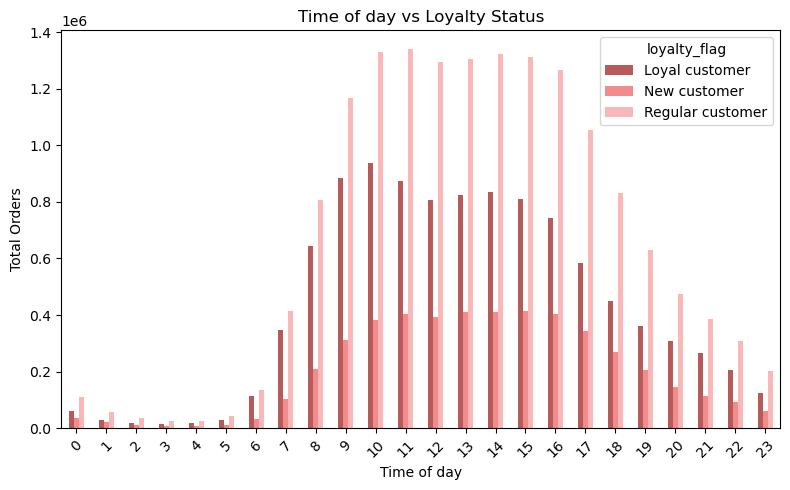

In [490]:
# plotting the relationship between the variable
hod_loyalty_bar = hod_loyalty_crosstab.plot(kind='bar', figsize=(8,5), color = ['#B65A5A', '#F28C8C', '#F9B7B7'])
                                          
# tidying up the axis labels and name of chart
hod_loyalty_bar.set_title('Time of day vs Loyalty Status')
hod_loyalty_bar.set_xlabel('Time of day')
hod_loyalty_bar.set_ylabel('Total Orders')
hod_loyalty_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [491]:
# Exporting plot 
hod_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 hod_loyalty_bar.png'))

In [493]:
# Building crosstab between order_hour_of_day and  price_range_loc
hod_price_range_crosstab = pd.crosstab(ords_prods_all_cfo['order_hour_of_day'],ords_prods_all_cfo['price_range_loc'])

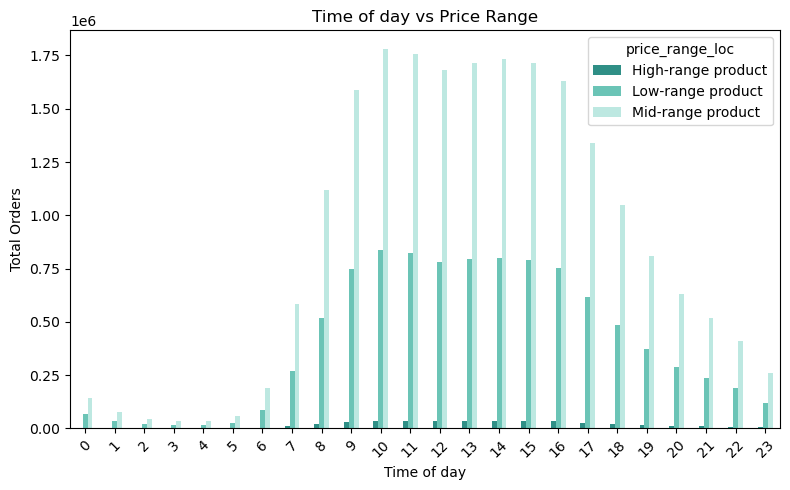

In [495]:
# plotting the relationship between the variable
hod_price_range_bar = hod_price_range_crosstab.plot(kind='bar', figsize=(8,5), color = ['#2F8F86', '#6BC4B6', '#BDE8E1'])
                                          
# tidying up the axis labels and name of chart
hod_price_range_bar.set_title('Time of day vs Price Range')
hod_price_range_bar.set_xlabel('Time of day')
hod_price_range_bar.set_ylabel('Total Orders')
hod_price_range_bar.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [496]:
# Exporting plot 
hod_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 hod_price_range_bar.png'))

In [498]:
# Building crosstab between department and  price_range_loc
dept_price_range_crosstab = pd.crosstab(ords_prods_all_cfo['department_id'].map(dept_dict),ords_prods_all_cfo['price_range_loc'])

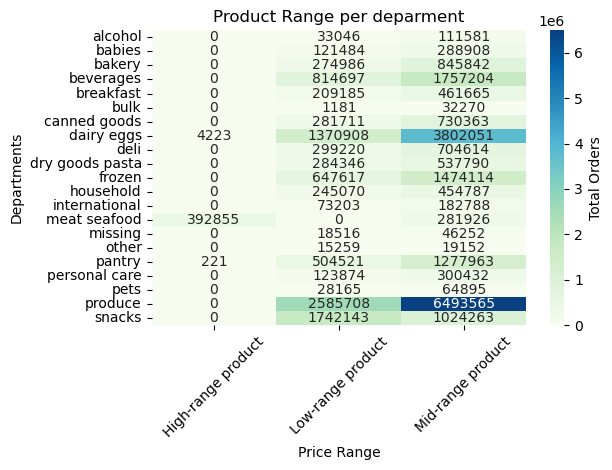

In [513]:
# plotting - which departments have the highest frequency of products ordered?
dept_price_range_heat = sns.heatmap(dept_price_range_crosstab, annot=True, fmt='d', cmap='GnBu', cbar_kws={'label': 'Total Orders'})

# tidying up the axis labels and name of chart
dept_price_range_heat.set_title('Product Range per deparment')
dept_price_range_heat.set_xlabel('Price Range')
dept_price_range_heat.set_ylabel('Departments')
dept_price_range_heat.tick_params(axis='x', rotation=45)

# avoiding .png to be cut
plt.tight_layout()

In [514]:
# Exporting plot 
dept_price_range_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 dept_price_range_heat.png'))